In [4]:
import sys
sys.version

'3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)]'

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection

In [25]:
from sklearn.datasets import load_iris
data_iris = load_iris()
iris = pd.DataFrame(data_iris.data, columns = data_iris.feature_names)
iris['class'] = data_iris.target_names[data_iris.target]
iris.head(20)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 5.1               3.5                1.4               0.2   
1                 4.9               3.0                1.4               0.2   
2                 4.7               3.2                1.3               0.2   
3                 4.6               3.1                1.5               0.2   
4                 5.0               3.6                1.4               0.2   
5                 5.4               3.9                1.7               0.4   
6                 4.6               3.4                1.4               0.3   
7                 5.0               3.4                1.5               0.2   
8                 4.4               2.9                1.4               0.2   
9                 4.9               3.1                1.5               0.1   
10                5.4               3.7                1.5               0.2   
11                4.8               3.4                1.6               0.2   
12                4.8               3.0                1.4               0.1   
13                4.3               3.0                1.1               0.1   
14                5.8               4.0                1.2               0.2   
15                5.7               4.4                1.5               0.4   
16                5.4               3.9                1.3               0.4   
17                5.1               3.5                1.4               0.3   
18                5.7               3.8                1.7               0.3   
19                5.1               3.8                1.5               0.3   

     class  
0   setosa  
1   setosa  
2   setosa  
3   setosa  
4   setosa  
5   setosa  
6   setosa  
7   setosa  
8   setosa  
9   setosa  
10  setosa  
11  setosa  
12  setosa  
13  setosa  
14  setosa  
15  setosa  
16  setosa  
17  setosa  
18  setosa  
19  setosa

In [26]:
iris.shape

(150, 5)

In [27]:
iris.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000

In [28]:
iris.groupby('class').size()

class
setosa        50
versicolor    50
virginica     50
dtype: int64

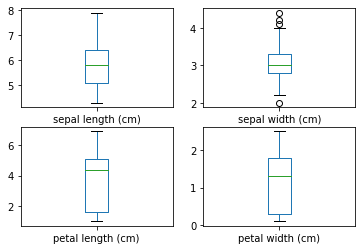

In [32]:
iris.plot(kind = 'box', subplots = True, layout = (2,2), sharex = False, sharey = False)
plt.show()

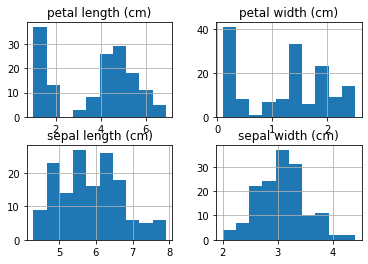

In [33]:
iris.hist()
plt.show()

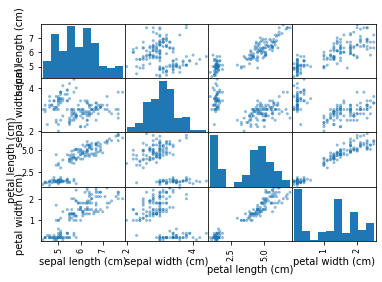

In [38]:
pd.plotting.scatter_matrix(iris)
plt.show()

In [48]:
array = iris.values
x = array[:, 0:4]
y = array[:, 4]
x_train,x_validation,y_train,y_validation = train_test_split(x,y, test_size = 0.2, random_state = 1)

In [49]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class = 'ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [50]:
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10)
    cv_results = cross_val_score(model, x_train,y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean()}, {cv_results.std()}")

LR: 0.95, 0.05527707983925667
LDA: 0.9749999999999999, 0.03818813079129868
KNN: 0.9583333333333333, 0.041666666666666685
NB: 0.9499999999999998, 0.05527707983925667
SVM: 0.9833333333333332, 0.03333333333333335


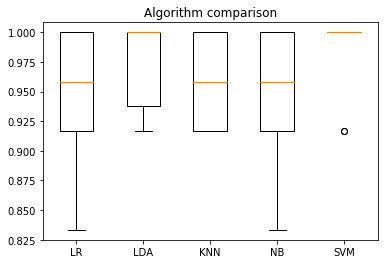

In [51]:
plt.boxplot(results, labels = names)
plt.title('Algorithm comparison')
plt.show()

In [52]:
model = SVC()
model.fit(x_train,y_train)
prediction = model.predict(x_validation)

In [53]:
print(accuracy_score(y_validation,prediction))
print(confusion_matrix(y_validation,prediction))
print(classification_report(y_validation,prediction))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

